<a href="https://colab.research.google.com/github/arnautoleg/BD_stud/blob/main/Paduca_Ala_ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
! pip install pyreadstat

In [3]:
df = pd.read_spss('/content/Patients data _parents_1.sav')
df



,patient,SType,SsubTypes,Tropiasubtypes,Age,Maturation,Children_age,Gender,Children_adult,Parents_gender,...,MRMLImbus,REye_Lenght,LEye_lenght,VAR00007,VAR00008,filter_$,Age_norm,Follow_up_norm,Age_sqrt,Age_inverse
0,1,Exotropia,Intermittent exotropia,IXT basic,40.0,AMA,NaN,Female,Adult,NaN,...,5.2,22.5,23.4,0.75,0.75,Not Selected,1.602060,0.903090,6.324555,0.025000
1,1022865,Exotropia,Intermittent exotropia,IXT basic,21.0,AMA,NaN,Male,Adult,NaN,...,5.9,25.0,25.8,-2.25,-3.00,Not Selected,1.322219,1.000000,4.582576,0.047619
2,1034,Exotropia,Intermittent exotropia,IXT basic,24.0,AMA,NaN,Female,Adult,NaN,...,4.8,21.0,19.6,3.00,5.50,Not Selected,1.380211,1.255273,4.898979,0.041667
3,10A,Exotropia,Intermittent exotropia,IXT divergence excess (distance),28.0,AMA,NaN,Female,Adult,NaN,...,5.3,22.8,23.0,NaN,-0.50,Not Selected,1.447158,NaN,5.291503,0.035714
4,11,Exotropia,Intermittent exotropia,IXT basic,31.0,AMA,NaN,Male,Adult,NaN,...,5.0,24.6,24.7,-1.00,-0.75,Not Selected,1.491362,1.000000,5.567764,0.032258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,894,Exotropia,Constant exotropia,Constant XT,9.0,AMA,under 6 years old,Female,Children,Female,...,5.3,22.8,20.0,0.50,3.25,Selected,0.954243,0.778151,3.000000,0.111111
210,8A,Exotropia,Intermittent exotropia,IXT convergence insuficience (near),41.0,AMA,NaN,Male,Adult,NaN,...,6.1,25.0,25.8,-3.50,-4.50,Not Selected,1.612784,0.602060,6.403124,0.024390
211,9463,Exotropia,Intermittent exotropia,IXT basic,41.0,AMA,NaN,Female,Adult,NaN,...,6.2,26.0,25.5,-4.00,-3.50,Not Selected,1.612784,1.079181,6.403124,0.024390
212,9588,Esotropia,Basic esotropia,Basic ET,19.0,AMA,NaN,Female,Adult,NaN,...,5.5,19.0,24.0,4.75,-0.50,Not Selected,1.278754,1.397940,4.358899,0.052632


In [4]:
list(df.columns)


['patient',
 'SType',
 'SsubTypes',
 'Tropiasubtypes',
 'Age',
 'Maturation',
 'Children_age',
 'Gender',
 'Children_adult',
 'Parents_gender',
 'POS',
 'SDMQ1',
 'SDMQ2',
 'SDMQ3',
 'SDMQ4',
 'SDMQ5',
 'SDMQ6',
 'SDMQ7',
 'SDMQ8',
 'SDMQ9',
 'SUM_SDM',
 'Refusal',
 'SM',
 'Parens_education',
 'Dpostop_6',
 'SUCCESS_OUTCOME',
 'REyeambl',
 'LEyeambl',
 'Unilateral_amblyopia',
 'Bilateral_amblyopia',
 'Ambliopia_degree',
 'Amblyopia_uni_bi',
 'Amblyopia_no_yes',
 'RBCVA',
 'LBCVA',
 'REye_sf',
 'REye_cyl',
 'REsf_equiv',
 'LEye_sf',
 'LEye_cyl',
 'LEsf_equiv',
 'Pattern',
 'Anisometropia',
 'RefractionREye',
 'RefractionLEye',
 'OURefr',
 'RMotility',
 'LMotility',
 'Prev_surgery',
 'Barriers',
 'AgeofDetection',
 'Str_detection',
 'FDTReye',
 'FDTLeye',
 'Surgery',
 'SIM_ASIM',
 'operatedeye',
 'Surgery_dominant',
 'Nrmuscles',
 'Recesion',
 'Resection',
 'BVD_PREOP',
 'VBd_preop',
 'BVDpostop',
 'VBd_postop',
 'BVN_Preop',
 'VBa_preop',
 'BVNpostop',
 'VBa_postop',
 'STEREO_Preop',
 '

In [5]:
df = df[df.Age>=15][['SUM_SDM', 'POS']]


In [6]:
! pip install scikit_posthocs

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from scikit_posthocs import posthoc_dunn
from scipy.stats import f_oneway

def boxplot_and_heatmap(data, category_col, numerical_col, category_order):
    # Set the style of the visualization
    sns.set(style="whitegrid")

    # Define category order if needed
    # category_order = data[category_col].unique()

    print(round(df.groupby([category_col])[numerical_col].describe(), 1))

    print()

    # Create a box plot
    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    sns.boxplot(x=category_col, y=numerical_col, data=data, order=category_order)
    plt.xlabel(category_col)
    plt.ylabel(numerical_col)
    plt.ylim(0, max(df[numerical_col]) + max(df[numerical_col])*0.2)
    plt.title('Boxplot comparative evaluation')

    # Calculate ANOVA F-test statistic
    f_statistic, f_p_value = f_oneway(*[group[1][numerical_col] for group in data.groupby(category_col)])

    # Display ANOVA F-test statistics
    print(f"ANOVA F-test: F = {f_statistic}, p = {f_p_value}")

    # posthoc dunn test, with correction for multiple testing
    dunn_df = posthoc_dunn(data, val_col=numerical_col, group_col=category_col, p_adjust="fdr_bh")

    plt.subplot(1, 2, 2)
    sns.heatmap(dunn_df, annot=True, linewidths=.5)
    plt.title('Post-hoc analysis {} '.format(category_col))

    # Adjust layout for better spacing
    plt.tight_layout()

    # Show the plots
    plt.show()


In [8]:
df.POS.value_counts().index

CategoricalIndex(['good (satisfied)', 'fair', 'very satisfied (excellent)',
                  'poor'],
                 categories=['fair', 'good (satisfied)', 'poor', 'very satisfied (excellent)'], ordered=False, dtype='category', name='POS')

In [9]:
df['POS'] = df['POS'].replace(['fair', 'good (satisfied)', 'poor', 'very satisfied (excellent)'], ['fair', 'good', 'poor', 'excellent'])

In [10]:
df['POS'] = pd.Categorical(df['POS'], categories=['poor', 'fair', 'good', 'excellent'], ordered=True)

           count  mean  std   min   25%   50%   75%   max
POS                                                      
poor         9.0  29.3  2.3  25.0  29.0  29.0  30.0  33.0
fair        28.0  29.8  1.9  26.0  28.8  30.0  31.0  34.0
good        41.0  32.3  2.1  26.0  32.0  32.0  33.0  40.0
excellent   15.0  34.7  1.3  32.0  34.0  35.0  36.0  36.0

ANOVA F-test: F = 26.64655796816019, p = 2.17170189431228e-12


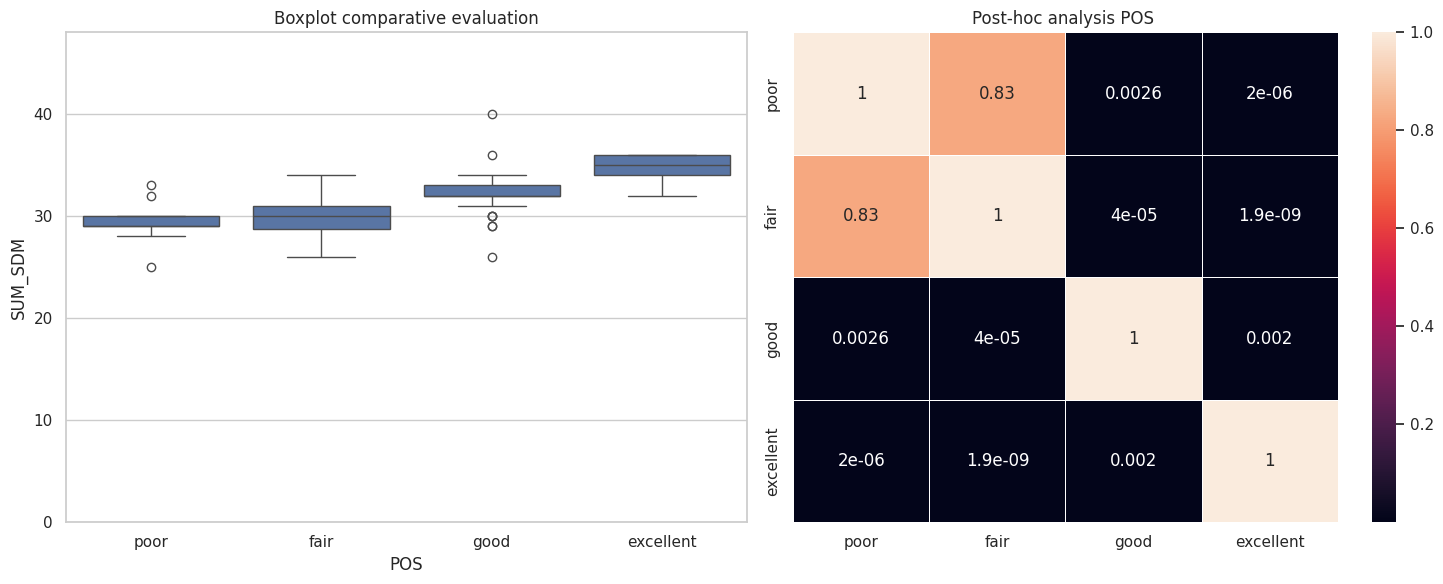

In [15]:
for cat in ['POS']:
  for el in ['SUM_SDM']:
     boxplot_and_heatmap(df, cat, el, category_order=None)